In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [2]:
df = pd.read_csv('telco_chrun_encoded.csv')
# df = df.sample(frac = 1,random_state = 3)

In [3]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
gender                             7032 non-null int64
senior                             7032 non-null int64
partner                            7032 non-null int64
dependents                         7032 non-null int64
tenure                             7032 non-null int64
phone_service                      7032 non-null int64
multiple_lines                     7032 non-null int64
online_security                    7032 non-null int64
online_backup                      7032 non-null int64
device_protection                  7032 non-null int64
tech_support                       7032 non-null int64
streaming_tv                       7032 non-null int64
streaming_movies                   7032 non-null int64
paperless_billing                  7032 non-null int64
monthly_charges                    7032 non-null float64
total_charges                      7032 non-null float64
churn    

In [5]:
y = df['churn']
X = df.drop('churn',axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

Confusion matrix - Train : 
 [[3217  366]
 [ 575  764]]
Overall accuracy :  0.8088175538399025
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.85      0.90      0.87      3583
           1       0.68      0.57      0.62      1339

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.75      4922
weighted avg       0.80      0.81      0.80      4922

AUC - Train :  0.8611846832096718

Confusion matrix - Test : 
 [[1414  166]
 [ 229  301]]
Overall accuracy - Test :  0.8127962085308057
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1580
           1       0.64      0.57      0.60       530

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.81      0.81      0.81      2110

AUC - Test :  0.8450155242417005


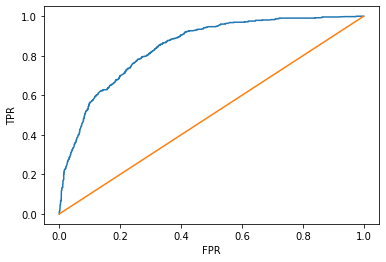

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=3)

#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

ada.fit(X_train,y_train)
y_train_ypred = ada.predict(X_train)
y_train_prob = ada.predict_proba(X_train)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### LIGHTGBM CLASSIFIER

In [13]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {
    'n_estimators' : sp_randint(50,200),
    'num_leaves' : sp_randint(20,50),
    'max_depth' : sp_randint(2,15),
    'learning_rate' : sp_uniform(0.001,0.5)
}

rsearchcv_lgbm = RandomizedSearchCV(lgbm,param_distributions=params,\
                   n_iter=200,cv = 3,random_state = 3, n_jobs=-1)

rsearchcv_lgbm.fit(X,y)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D93602504

In [16]:
rsearchcv_lgbm.best_params_

{'learning_rate': 0.0906442884867189,
 'max_depth': 2,
 'n_estimators': 102,
 'num_leaves': 45}

Confusion matrix - Train : 
 [[3258  325]
 [ 596  743]]
Overall accuracy :  0.812880942706217
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.85      0.91      0.88      3583
           1       0.70      0.55      0.62      1339

    accuracy                           0.81      4922
   macro avg       0.77      0.73      0.75      4922
weighted avg       0.80      0.81      0.81      4922

AUC - Train :  0.8639726181868281

Confusion matrix - Test : 
 [[1422  158]
 [ 245  285]]
Overall accuracy - Test :  0.8090047393364929
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.64      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

AUC - Test :  0.8462885120611416


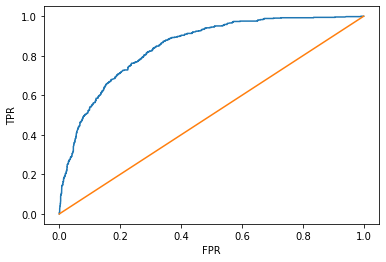

In [17]:
lgbm = lgb.LGBMClassifier(**rsearchcv_lgbm.best_params_)


#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

lgbm.fit(X_train,y_train)
y_train_ypred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,-1]


print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()